In [25]:
import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
sys.path.append('/global/project/projectdirs/desi/mocks/bgs/MXXL/one_percent')
import footprint 
import h5py
import S4Mock_io
from corr_func_tools import calc_wtheta,create_axes
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [20]:

f     = h5py.File('/global/cfs/cdirs/desi/mocks/MXXL/v4.0/one_percent/one_percent_v2/randoms.hdf5', mode='r')
ra = f['Data']['ra'][:]
dec = f['Data']['dec'][:]
r   = f["Data/app_mag"][...]

temp = np.c_[ra, dec,r]

rand = Table(temp, names=['RA', 'DEC','APP_MAG'])
rand = rand[rand['APP_MAG']<19.5]

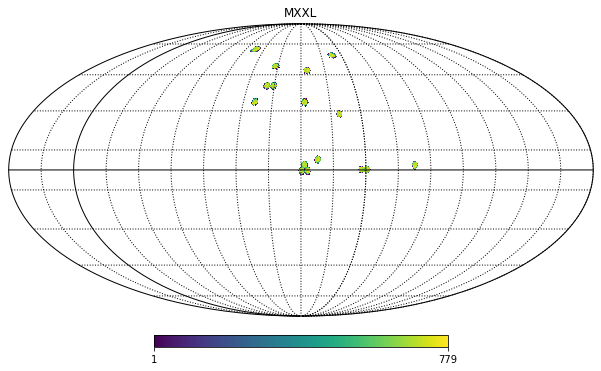

In [19]:
import geometry
import healpy as hp
target_pixel_density = geometry.targ_hpmap(rand[:500000],nside=128)#[:500000])
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='MXXL')
hp.graticule(dpar=5, dmer=5)

In [27]:
#mxxl = S4Mock_io.read_mxxl(small=False)

wtheta_all = []
for i in range(36):
    f     = h5py.File('/global/cfs/cdirs/desi/mocks/MXXL/v4.0/one_percent/one_percent_v2/mock_{}.hdf5'.format(i), mode='r')

    ra  = f["Data/ra"][...]
    dec = f["Data/dec"][...]
    r   = f["Data/app_mag"][...]

    f.close()

    temp = np.c_[ra, dec, r]

    mxxl = Table(temp, names=['RA', 'DEC','APP_MAG'])
    mxxl = mxxl[mxxl['APP_MAG']<19.5]
    
    wtheta_all.append(calc_wtheta(mxxl['RA'],mxxl['DEC'],rand_ra[:500000],rand_dec[:500000]))
    print(i)

wtheta_all = np.c_[wtheta_all]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [31]:
np.save('wtheta_all2',wtheta_all)

In [29]:
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

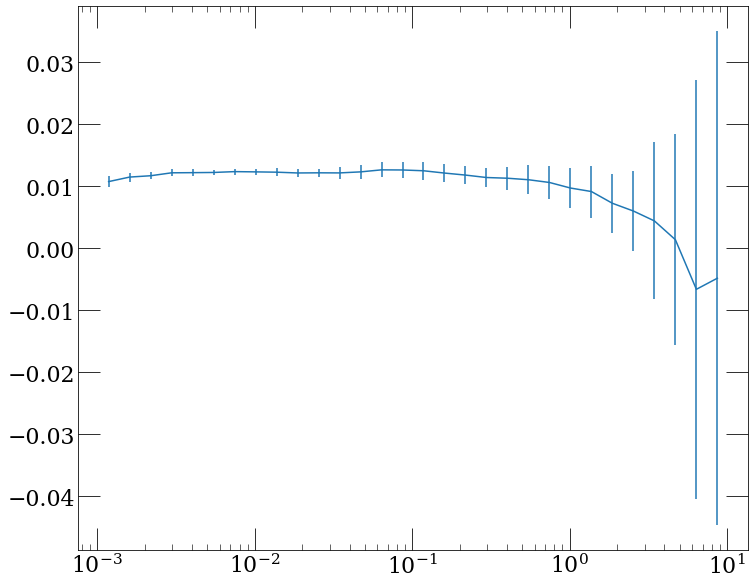

In [30]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

x_axis,y_axis = create_axes(mean)
x_axis,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis,y_axis,yerr=y_axis_err)

plt.xscale('log')